In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv


In [2]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
train = pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/train.csv")
test = pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/test.csv")

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
def remove_user(text):
    
    text = re.sub("@[\w]*", "", text)
    
    return text

In [6]:
train["clean_tweet"] = train["tweet"].apply(lambda x : remove_user(x))
test["clean_tweet"] = test["tweet"].apply(lambda x : remove_user(x))

In [7]:
train.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
'''
#sum = 0
def check_user(text):
    #sum = 0
    value = re.findall("@[\w]*", text)
    #sum += len(value)
    #print(sum)
    return len(value)

train["tweet_count"] = train["tweet"].apply(lambda x : check_user(x))
train["new_tweet_count"] = train["clean_tweet"].apply(lambda x : check_user(x))

train.describe()

train = train.drop("tweet_count", axis = 1)
train = train.drop("new_tweet_count", axis = 1)
'''

'\n#sum = 0\ndef check_user(text):\n    #sum = 0\n    value = re.findall("@[\\w]*", text)\n    #sum += len(value)\n    #print(sum)\n    return len(value)\n\ntrain["tweet_count"] = train["tweet"].apply(lambda x : check_user(x))\ntrain["new_tweet_count"] = train["clean_tweet"].apply(lambda x : check_user(x))\n\ntrain.describe()\n\ntrain = train.drop("tweet_count", axis = 1)\ntrain = train.drop("new_tweet_count", axis = 1)\n'

In [9]:
test.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
def remove_punc(text):
    
    text = re.sub("[^a-zA-Z#]", " ", text)
    
    return text

In [11]:
train["clean_tweet"] = train["clean_tweet"].apply(lambda x : remove_punc(x))
test["clean_tweet"] = test["clean_tweet"].apply(lambda x : remove_punc(x))

In [12]:
train.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [13]:
train["clean_tweet"] = train["clean_tweet"].apply(lambda x : " ".join([w for w in x.split() if len(w) > 3]))
test["clean_tweet"] = test["clean_tweet"].apply(lambda x : " ".join([w for w in x.split() if len(w) > 3]))

In [14]:
train.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [15]:
train_test = train.append(test, ignore_index= True)

In [16]:
token_tweet = train_test["clean_tweet"].apply(lambda x : x.split())

In [17]:
token_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [18]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

In [19]:
def steming(text):
    x = []
    for i in text:
        x.append(stemmer.stem(i))
    
    return x

In [20]:
token_tweet = token_tweet.apply(lambda x : steming(x))

In [21]:
token_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [22]:
for i in range(len(token_tweet)):
    token_tweet[i] = " ".join(token_tweet[i])

In [23]:
train_test["clean_tweet"] = token_tweet

In [24]:
train_test.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [25]:
all_word = " ".join([w for w in train_test["clean_tweet"]])

In [26]:
from wordcloud import WordCloud

In [27]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_word)

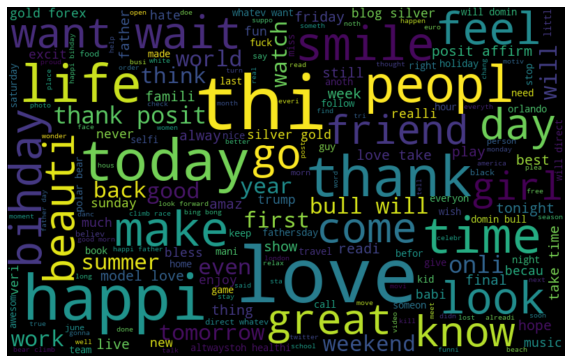

In [28]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

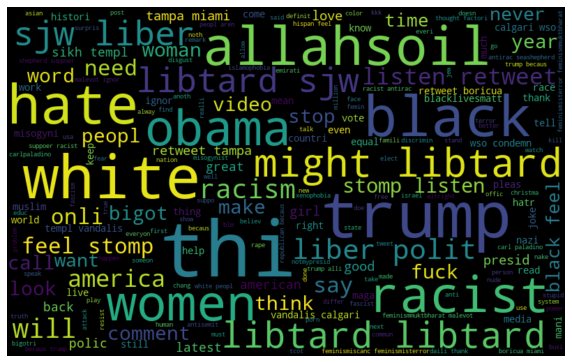

In [29]:
negative = " ".join([w for w in train_test["clean_tweet"][train_test["label"] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

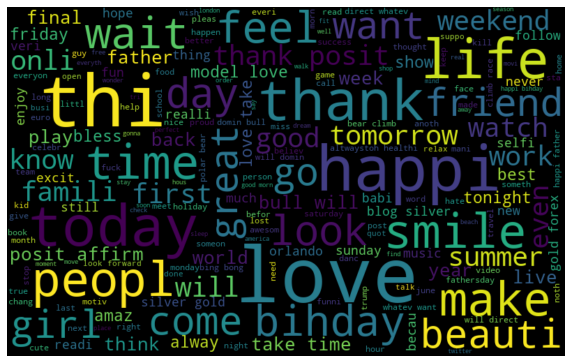

In [30]:
positive = " ".join([w for w in train_test["clean_tweet"][train_test["label"] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
def hashtag_extract(x):
    hashtag = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtag.append(ht)
    return hashtag

In [32]:
hash_normal = hashtag_extract(train_test["clean_tweet"][train_test["label"] == 0])
hash_racist = hashtag_extract(train_test["clean_tweet"][train_test["label"] == 1])


In [33]:
hash_normal = sum(hash_normal, [])
hash_racist = sum(hash_racist, [])

In [34]:
a = nltk.FreqDist(hash_normal)
df_a = pd.DataFrame({"Hashtag": list(a.keys()),
                    "Count": list(a.values())})
df_a = df_a.nlargest(columns = "Count", n=10)

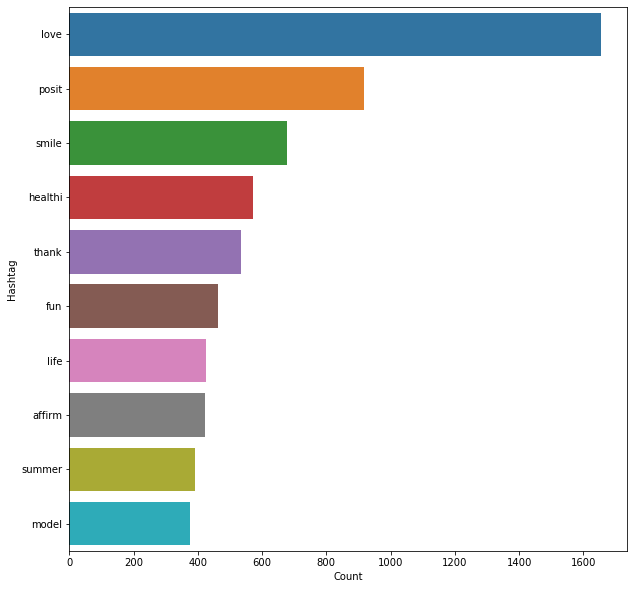

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_a, x="Count", y="Hashtag")

In [36]:
b = nltk.FreqDist(hash_racist)
df_b = pd.DataFrame({"Hashtag": list(b.keys()),
                    "Count": list(b.values())})
df_b = df_b.nlargest(columns="Count", n=10)

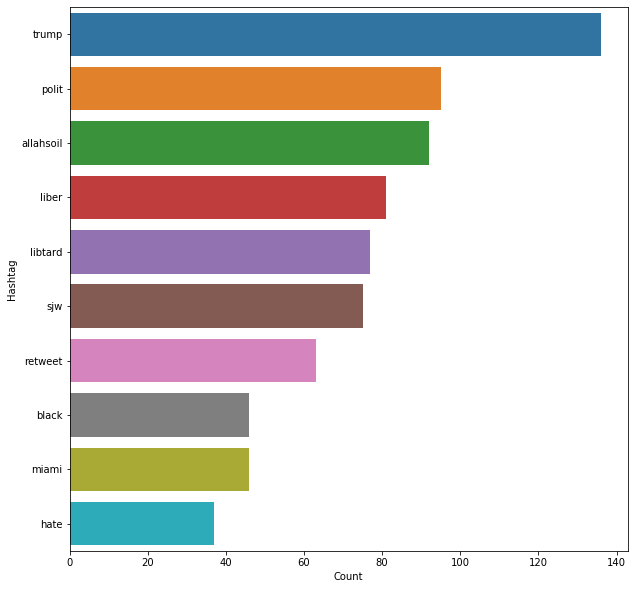

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_b, x="Count", y="Hashtag")

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")

In [39]:
bow = bow_vect.fit_transform(train_test["clean_tweet"])

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")

In [41]:
tfidf = tfidf_vect.fit_transform(train_test["clean_tweet"])

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [43]:
train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

In [44]:
xtrain_bow, xval_bow, ytrain, yval = train_test_split(train_bow, train["label"], random_state = 42, test_size=0.3)

In [45]:
logistic = LogisticRegression()
logistic.fit(xtrain_bow, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
pred_bow = logistic.predict_log_proba(xval_bow)

In [47]:
predict_int = pred_bow[:,1] >= 0.3
predict_int = predict_int.astype(np.int)

In [48]:
pred_bow_new = logistic.predict(xval_bow)

In [49]:
f1_score(yval, predict_int)

0.0

In [50]:
f1_score(yval, pred_bow_new)

0.48460774577954313

In [51]:
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]

xtrain_tfidf = train_tfidf[ytrain.index]
xval_tfidf = train_tfidf[yval.index]

In [52]:
logistic.fit(xtrain_tfidf, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
pred_tfidf = logistic.predict(xval_tfidf)

In [54]:
f1_score(yval, pred_tfidf)

0.45714285714285713

In [55]:
pred_prob_tf = logistic.predict_proba(xval_tfidf)
pred_tf_int = pred_prob_tf[:,1] >= 0.3
pred_tf_int = pred_tf_int.astype(np.int)

In [56]:
f1_score(yval, pred_tf_int)

0.5448092280390417